## The given data set has five indepndent variables ,the dependent varible is lungcap(target) .From these feature (one is Categorical feature and other are numeric)we can predict the lung capacity of a human as model is working best for linear regression.

In [67]:
import pandas as pd

In [68]:
import numpy as np

In [69]:
lung_cap=pd.read_csv("LungCap.csv")
lung_cap.head(3)

,LungCap,Age,Height,Smoke,Gender,Caesarean
0,6.475,6,62.1,no,male,no
1,10.125,18,74.7,yes,female,no
2,9.550,16,69.7,no,female,yes


In [70]:
lung_cap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 725 entries, 0 to 724
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LungCap    725 non-null    float64
 1   Age        725 non-null    int64  
 2   Height     725 non-null    float64
 3   Smoke      725 non-null    object 
 4   Gender     725 non-null    object 
 5   Caesarean  725 non-null    object 
dtypes: float64(2), int64(1), object(3)
memory usage: 34.1+ KB


In [71]:
lung_cap.isna().sum()

LungCap      0
Age          0
Height       0
Smoke        0
Gender       0
Caesarean    0
dtype: int64

In [72]:
lung_cap.Smoke.value_counts()

no     648
yes     77
Name: Smoke, dtype: int64

In [73]:
lung_cap.Gender.value_counts()

male      367
female    358
Name: Gender, dtype: int64

In [74]:
lung_cap.Caesarean.value_counts()

no     561
yes    164
Name: Caesarean, dtype: int64

In [75]:
lung_cap=pd.get_dummies(lung_cap,prefix=["Smoke","Gender","Caesarean"]) #get_dummies help to create variable with respect to no of category in data set

lung_cap

,LungCap,Age,Height,Smoke_no,Smoke_yes,Gender_female,Gender_male,Caesarean_no,Caesarean_yes
0,6.475,6,62.1,1,0,0,1,1,0
1,10.125,18,74.7,0,1,1,0,1,0
2,9.550,16,69.7,1,0,1,0,0,1
3,11.125,14,71.0,1,0,0,1,1,0
4,4.800,5,56.9,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...
720,5.725,9,56.0,1,0,1,0,1,0
721,9.050,18,72.0,0,1,0,1,0,1
722,3.850,11,60.5,0,1,1,0,1,0
723,9.825,15,64.9,1,0,1,0,1,0


In [76]:
lung_cap.head()

,LungCap,Age,Height,Smoke_no,Smoke_yes,Gender_female,Gender_male,Caesarean_no,Caesarean_yes
0,6.475,6,62.1,1,0,0,1,1,0
1,10.125,18,74.7,0,1,1,0,1,0
2,9.550,16,69.7,1,0,1,0,0,1
3,11.125,14,71.0,1,0,0,1,1,0
4,4.800,5,56.9,1,0,0,1,1,0


In [77]:
var=lung_cap.iloc[:,1:] #independent varaibles (from which we predict)
var.head()

,Age,Height,Smoke_no,Smoke_yes,Gender_female,Gender_male,Caesarean_no,Caesarean_yes
0,6,62.1,1,0,0,1,1,0
1,18,74.7,0,1,1,0,1,0
2,16,69.7,1,0,1,0,0,1
3,14,71.0,1,0,0,1,1,0
4,5,56.9,1,0,0,1,1,0


In [78]:
target=lung_cap.iloc[:,0] #target (the column of prediction lung cap) 
target.head(3)

0     6.475
1    10.125
2     9.550
Name: LungCap, dtype: float64

In [91]:
from sklearn.model_selection import train_test_split

In [97]:
x_train,x_test,y_train,y_test=train_test_split(var,target,test_size=0.25,random_state=42)

In [98]:
from sklearn.linear_model import LinearRegression



In [99]:
l_reg=LinearRegression()

In [100]:
l_reg.fit(x_train,y_train)

LinearRegression()

In [102]:
l_reg.coef_ #slop

array([ 0.15454368,  0.26863295,  0.27211744, -0.27211744, -0.20579829,
        0.20579829,  0.11331706, -0.11331706])

In [103]:
l_reg.intercept_ 

-11.775032588248047

In [104]:
y_pred=l_reg.predict(x_train)

In [105]:
error=y_pred-y_train #MSE ERROR

In [106]:
error

296   -0.663618
286   -0.607034
470   -0.146402
83     0.773031
61     0.100579
         ...   
71     0.265207
106    0.695687
270   -0.730428
435   -0.367396
102    2.452065
Name: LungCap, Length: 543, dtype: float64

In [107]:
MSE=np.mean(np.square(error))
MSE

1.0188930750737228

In [108]:
y_test_pred=l_reg.predict(x_test)

In [109]:
test_error=y_test_pred-y_test

In [110]:
MSE_test=np.mean(np.square(test_error))

In [111]:
MSE_test

1.078352086875044

In [113]:
r_square=l_reg.score(x_train,y_train) #(1-(sum of resdual/sum of mean))R² is used as a method to explain how best the fitted line accounts for the data
r_square #more near to 1 model is working good

0.8585514898151886

In [114]:
n=len(x_train)
k=len(lung_cap.columns)
adj_r_square = 1 - (((1-r_square)*(n-1))/(n-k-1))
adj_r_square

0.8561630534330811

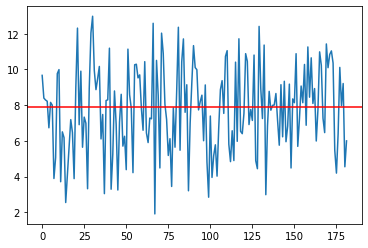

In [115]:
import matplotlib.pyplot as plt
plt.plot(y_test_pred)
plt.axhline(np.mean(y_test), color = 'r')


(array([ 4.,  9., 24., 25., 31., 35., 26., 18.,  7.,  3.]),
 array([ 1.575 ,  2.8725,  4.17  ,  5.4675,  6.765 ,  8.0625,  9.36  ,
        10.6575, 11.955 , 13.2525, 14.55  ]),
 <BarContainer object of 10 artists>)

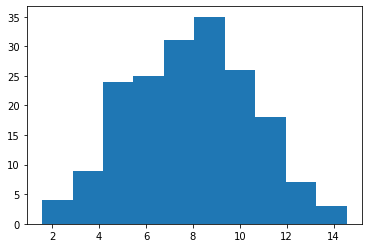

In [117]:
plt.hist(y_test)